## Dependencias

In [35]:
import cv2,keras
import numpy as np 

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_addons as tfa

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

## Definición y procesado imagen

In [36]:
target_size=640
#tamaño recomendado para YOLOv5

In [56]:
img = mpimg.imread('0e24188ec98165df20240226105303858.jpeg')
# uso de matplotlib para cargar la imagen y cuardarla en matriz de numpy


In [57]:
img.shape

(512, 512, 3)

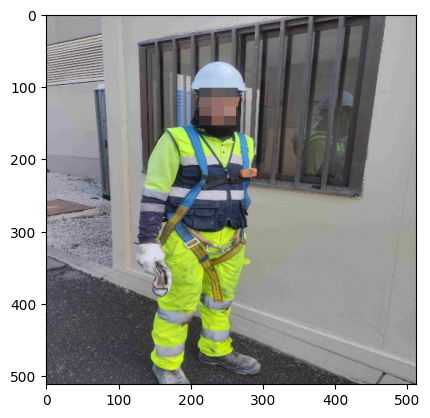

In [58]:
plt.imshow(img)

In [59]:
imgres = cv2.resize(img, (target_size, target_size))
# uso de librería de opencv para redimensionar la imagen

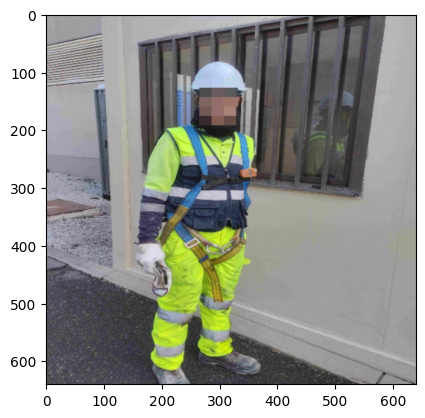

In [60]:
plt.imshow(imgres)

In [61]:
imgres.shape
# imagen ahora ya tiene tamaño de 640x640

(640, 640, 3)

In [62]:
imgres

array([[[166, 166, 166],
        [162, 162, 162],
        [159, 159, 159],
        ...,
        [178, 178, 178],
        [178, 178, 178],
        [177, 177, 177]],

       [[167, 167, 167],
        [161, 161, 161],
        [158, 158, 158],
        ...,
        [178, 178, 178],
        [177, 177, 177],
        [175, 175, 175]],

       [[166, 166, 166],
        [164, 164, 164],
        [164, 164, 164],
        ...,
        [178, 178, 178],
        [176, 176, 176],
        [175, 175, 175]],

       ...,

       [[ 77,  76,  82],
        [ 81,  80,  84],
        [ 79,  78,  81],
        ...,
        [131, 131, 132],
        [133, 133, 133],
        [136, 136, 136]],

       [[ 80,  79,  86],
        [ 77,  76,  83],
        [ 80,  79,  84],
        ...,
        [104, 104, 105],
        [122, 122, 122],
        [132, 132, 132]],

       [[ 91,  90,  98],
        [ 78,  77,  84],
        [ 87,  86,  93],
        ...,
        [ 61,  61,  62],
        [ 98,  98,  98],
        [114, 114, 114]]

In [63]:
imgres = imgres / 255.0
# normalización de la imagen (necesario para modelo) --> se divide cada píxel por 255 para que estén en el rango de 0 a 1

In [65]:
imgres

array([[[0.65098039, 0.65098039, 0.65098039],
        [0.63529412, 0.63529412, 0.63529412],
        [0.62352941, 0.62352941, 0.62352941],
        ...,
        [0.69803922, 0.69803922, 0.69803922],
        [0.69803922, 0.69803922, 0.69803922],
        [0.69411765, 0.69411765, 0.69411765]],

       [[0.65490196, 0.65490196, 0.65490196],
        [0.63137255, 0.63137255, 0.63137255],
        [0.61960784, 0.61960784, 0.61960784],
        ...,
        [0.69803922, 0.69803922, 0.69803922],
        [0.69411765, 0.69411765, 0.69411765],
        [0.68627451, 0.68627451, 0.68627451]],

       [[0.65098039, 0.65098039, 0.65098039],
        [0.64313725, 0.64313725, 0.64313725],
        [0.64313725, 0.64313725, 0.64313725],
        ...,
        [0.69803922, 0.69803922, 0.69803922],
        [0.69019608, 0.69019608, 0.69019608],
        [0.68627451, 0.68627451, 0.68627451]],

       ...,

       [[0.30196078, 0.29803922, 0.32156863],
        [0.31764706, 0.31372549, 0.32941176],
        [0.30980392, 0

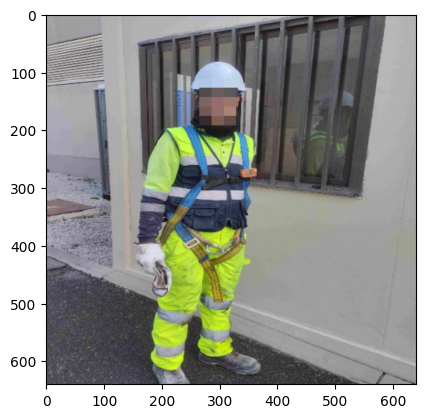

In [66]:
plt.imshow(imgres)
# imagen normalizada

## Inferencia modelo

In [67]:
aux=np.moveaxis(imgres, 1, 0)

In [69]:
aux.shape

(640, 640, 3)

In [81]:
# Define los nombres de las clases
#class_names = ['guante', 'casco', 'bota', 'arnes_pecho', 'arnes_espalda']  # Ajusta según tus clases

# Cargar el modelo TensorFlow Lite
interpreter = tf.lite.Interpreter(model_path="modelos/best_exp_fotosarneses2-fp16.tflite")
interpreter.allocate_tensors()

# Obtener los detalles del input y output
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Ejemplo de datos de entrada
input_data = np.array([aux], dtype=np.float32)


# Establecer los datos de entrada
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()

# Obtener los resultados de la inferencia
output_data = interpreter.get_tensor(output_details[0]['index'])




## Interpretación resultado

In [82]:
input_data.shape

(1, 640, 640, 3)

In [83]:
output_data

array([[[0.00798301, 0.0052836 , 0.01950694, ..., 0.14422132,
         0.00633009, 0.00811974],
        [0.00888097, 0.00703518, 0.02712548, ..., 0.11386755,
         0.00636787, 0.0110628 ],
        [0.01037349, 0.00635768, 0.03347557, ..., 0.09752708,
         0.01261599, 0.01604126],
        ...,
        [0.9563424 , 0.9675605 , 0.08019006, ..., 0.04117788,
         0.03828113, 0.02583833],
        [0.9548415 , 0.9576995 , 0.09207234, ..., 0.03336859,
         0.09458303, 0.06475817],
        [0.9623393 , 0.956543  , 0.22898132, ..., 0.02956267,
         0.2239219 , 0.09948637]]], dtype=float32)

In [85]:
output_data.shape

(1, 25200, 10)

In [86]:
output_data[0].shape 
#esta es la predicción de la imagen, que consta de: 25200 registros (predicciones) y 10 columnas (4 primeras para las coordenadas del bbox, 1 para la confianza y 5 para las clases)

(25200, 10)

In [87]:
output_data[0][..., 4:5]
# indica la columna de confianza de cada predicción

array([[2.07758967e-06],
       [1.69507689e-06],
       [1.85239196e-06],
       ...,
       [4.87619400e-05],
       [1.41891305e-05],
       [3.25355404e-06]], dtype=float32)

In [89]:
output_data[0][1,9] 
# predicción de la cuarta clase de la segunda celda de predicción

0.011062802

## Filtrado

In [93]:
# th_conf = 0.1 # threshold de confianza

# pred = output_data[0] # predicciones

# print (max(pred[...,4])) # confianza máxima

# pc = pred[...,4] > th_conf # predicciones con confianza mayor al threshold

# if len(pc)==0:
#     print('No hay ningún objeto detectado')


In [94]:
### PARA VER LAS CLASES PREDICHAS Y SU SCORE

th_conf = 0.1 # threshold de confianza

output_data = output_data[0] #esto es el equivalente a val nuevaDimension = intArrayOf(shape[1], shape[2]) y val reshapedArray = Array(nuevaDimension[0]) { FloatArray(nuevaDimension[1]) } en kotlin 
classdata = output_data[..., 5:]

# se inicializan listas vacías para guardar los scores de cada clase
guante=[]
casco=[]
bota=[]
arnes_espalda=[]
arnes_pecho=[]

for i in range(1,len(output_data)): #se recorre cada predicción
    if output_data[i,4:5] >= th_conf: #establecemos un umbral de confianza de 0.1

        scr_guante = classdata[i, 0]
        scr_casco = classdata[i, 1] 
        scr_bota = classdata[i, 2]
        scr_arnes_pecho = classdata[i, 3]
        scr_arnes_espalda = classdata[i, 4]
        
        guante.append(scr_guante)
        casco.append(scr_casco)
        bota.append(scr_bota)
        arnes_pecho.append(scr_arnes_pecho)
        arnes_espalda.append(scr_arnes_espalda)

## Detección

In [96]:
th_scr = 0.98 # threshold de scores de clase

try:
    print('¿Hay guante?: ' + ("Sí" if np.amax(guante) > th_scr else "No"))
    print('¿Hay casco?: ' + ("Sí" if np.amax(casco) > th_scr else "No"))
    print('¿Hay bota?: ' + ("Sí" if np.amax(bota) > th_scr else "No"))
    print('¿Hay arnés?: ' + ("Sí" if np.amax(arnes_pecho) > th_scr or np.amax(arnes_espalda) > th_scr else "No")) 

except ValueError:
    print('No se detecta ningún objeto')

¿Hay guante?: Sí
¿Hay casco?: Sí
¿Hay bota?: Sí
¿Hay arnés?: Sí


In [31]:
np.max(arnes_pecho)

0.99776644

In [33]:
arnes_pecho

[0.0007796339,
 0.00048865133,
 0.000919658,
 0.0005814554,
 0.000592438,
 0.00043345854,
 0.0007484661,
 0.00050191296,
 0.0005952684,
 0.0005828806,
 0.00034154375,
 0.00041137155,
 0.0013650579,
 0.00024212385,
 0.00029012933,
 0.00034431642,
 0.00049581594,
 0.0015932089,
 0.00040735,
 0.00053424155,
 0.00074177486,
 0.00088425534,
 0.001300799,
 0.00021912759,
 0.0025223873,
 0.0009578272,
 0.00078339095,
 0.0002398277,
 0.001551294,
 0.0011705277,
 0.00038599907,
 0.00022180392,
 0.00038132392,
 0.0003196985,
 0.00012091592,
 0.000108272856,
 0.00018601705,
 0.0002124287,
 0.0003633117,
 0.0003065247,
 0.00016091179,
 0.00015321678,
 0.0011572762,
 0.00090320286,
 0.0022649805,
 0.00090827764,
 0.0008431914,
 0.0014193701,
 0.0011106541,
 0.0008585136,
 0.0016875677,
 0.0012256311,
 0.0008762898,
 0.001892768,
 0.0011052432,
 0.001025042,
 0.001592854,
 0.001110819,
 0.00094908546,
 0.0014750361,
 0.0010974287,
 0.0011389866,
 0.0016762224,
 0.001022065,
 0.0008777714,
 0.0011262